
# **Imports:**

In [253]:
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
# import tensorflow_datasets as tfds
# from tensorflow.keras import layers
# from google.colab import files
# import os
# import copy
# import cv2
# import random
# from sklearn import model_selection
# from sklearn import preprocessing
# import keras
# from keras import layers
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image
# import cv2
# import os
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input, LSTM
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import os
# from sklearn.preprocessing import MinMaxScaler

In [254]:
import requests
import math
import time
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt


# **Methods:**

In [255]:
def url_generator(stock_index: str, interval: str, yyyy_mm_dd: str) -> str:
  return f"https://stooq.pl/q/a2/d/?s={stock_index}&i={interval}&f={yyyy_mm_dd}"

def parse_stock_data(txt_data: str) -> list:
  lista = txt_data.split()
  ret = []
  for x in lista:
    a = x.split(',')
    ret.append({"Date":a[0], "Time":a[1], "Open":float(a[2]), "High":float(a[3]), "Low":float(a[4]), "Close":float(a[5])})
  return ret

def print_number(liczba):
    return "{:.2f}".format(liczba)

def calculate_mean(numbers):
  summ = 0
  for numb in numbers:
    summ += numb
  return summ / len(numbers)

def get_normalized_data(numbers):
  minn = min(numbers)
  maxx = max(numbers)
  return [(x-minn)/(maxx-minn) for x in numbers]


In [256]:
def get_operation(stock_values: list):
  # return random.choice([0, 1, -1])
  # return random.randint(-1, 1)
  mean = calculate_mean(stock_values)
  last_stock_val = stock_values[-1]
  if last_stock_val > mean:
    return 1
  if mean > last_stock_val:
    return -1
  return 0


In [257]:
def plot_chart(chart_values):
  plt.rcParams["figure.figsize"] = (30,5)
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  major_ticks = np.arange(0, len(chart_values)+1, 20)
  minor_ticks = np.arange(0, len(chart_values)+1, 5)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.grid(which='minor', alpha=0.1)
  ax.grid(which='major', alpha=0.7)
  plt.plot(chart_values, c="b")

def plot_chart_with_operations(chart_values, operation_list):
  if len(chart_values) != len(operation_list):
    raise Exception("len(chart_values) != len(operation_list)")

  plt.rcParams["figure.figsize"] = (30,5)
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  major_ticks = np.arange(0, len(chart_values)+1, 20)
  minor_ticks = np.arange(0, len(chart_values)+1, 5)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.grid(which='minor', alpha=0.1)
  ax.grid(which='major', alpha=0.7)
  plt.plot(chart_values, c="b")

  for i, operation in enumerate(operation_list):
    if operation > 0:
      plt.plot(i, chart_values[i], "go")
    if operation < 0:
      plt.plot(i, chart_values[i], "ro")

def plot_chart_with_operations_and_money(chart_values, operation_list, money_list):
  if len(chart_values) != len(operation_list):
    raise Exception("len(chart_values) != len(operation_list)")
  if len(money_list) != len(operation_list):
    raise Exception("len(chart_values) != len(operation_list)")

  plt.rcParams["figure.figsize"] = (30,5)
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  major_ticks = np.arange(0, len(chart_values)+1, 20)
  minor_ticks = np.arange(0, len(chart_values)+1, 5)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.grid(which='minor', alpha=0.1)
  ax.grid(which='major', alpha=0.7)
  plt.plot(chart_values, c="b")
  plt.plot(money_list, c="y")

  for i, operation in enumerate(operation_list):
    if operation > 0:
      plt.plot(i, chart_values[i], "go")
    if operation < 0:
      plt.plot(i, chart_values[i], "ro")

def plot_chart_with_operations_money_and_mean(chart_values, operation_list, money_list, mean_list):
  if len(chart_values) != len(operation_list):
    raise Exception("len(chart_values) != len(operation_list)")
  if len(money_list) != len(operation_list):
    raise Exception("len(chart_values) != len(operation_list)")

  plt.rcParams["figure.figsize"] = (30,5)
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  major_ticks = np.arange(0, len(chart_values)+1, 20)
  minor_ticks = np.arange(0, len(chart_values)+1, 5)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.grid(which='minor', alpha=0.1)
  ax.grid(which='major', alpha=0.7)
  plt.plot(chart_values, c="b")
  plt.plot(money_list, c="y")
  plt.plot(mean_list, c="g")

  for i, operation in enumerate(operation_list):
    if operation > 0:
      plt.plot(i, chart_values[i], "go")
    if operation < 0:
      plt.plot(i, chart_values[i], "ro")

https://stooq.pl/q/a2/d/?s=usdpln&i=d&f=20240416
[3.65935, 3.6911, 3.68402]


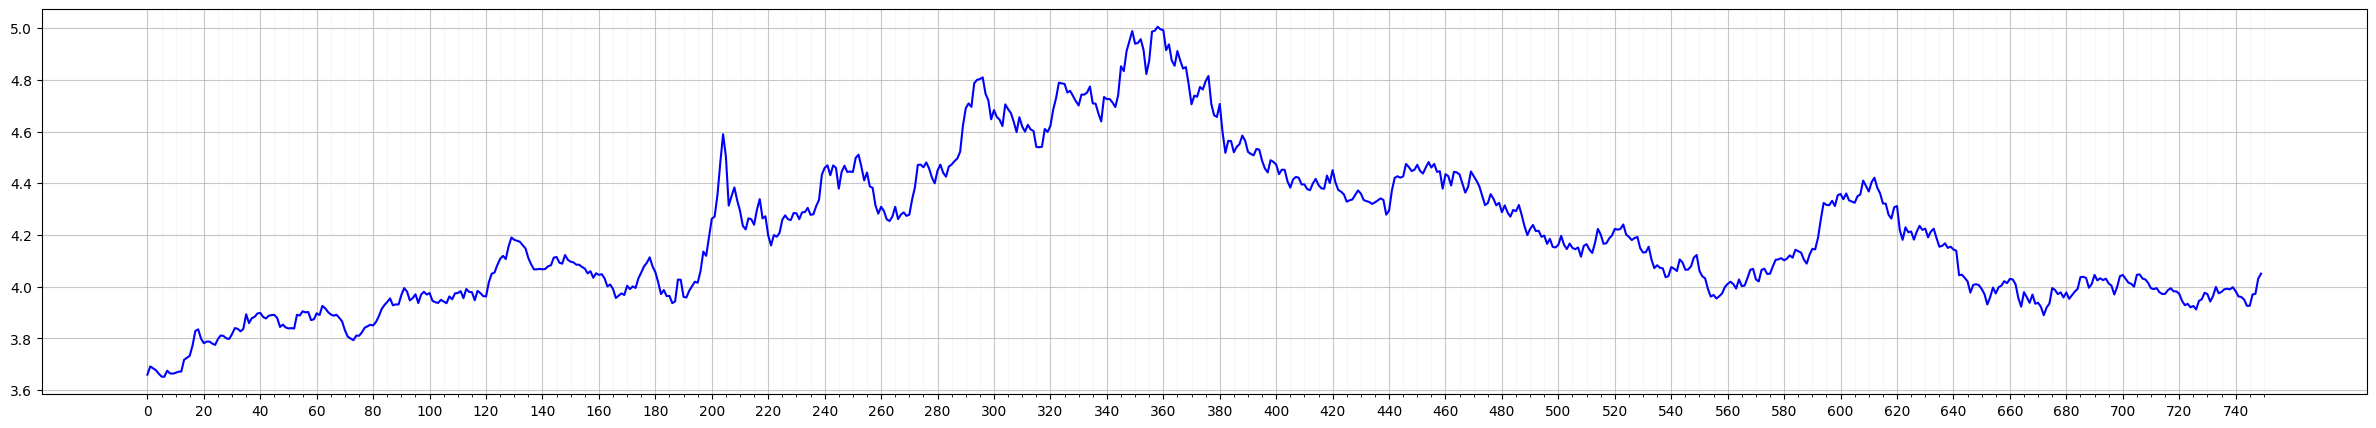

In [258]:
now = datetime.datetime.now()
stock_index = "usdpln"
yyyy_mm_dd = f"{now.year:04d}{now.month:02d}{now.day:02d}"
url = url_generator(stock_index, "d", yyyy_mm_dd)
print(url)
resp = requests.get(url)
row_list = parse_stock_data(resp.text)

stooq_vals = [x["Close"] for x in row_list]
# stooq_vals = stooq_vals[:540]
print(stooq_vals[:3])

plot_chart(stooq_vals)

In [259]:
def get_operation_without_noice(prev_val):
  tmp_mean = calculate_mean(prev_val)
  tmppppppp = 0
  if tmp_mean > 0:
    tmppppppp = 1
  if tmp_mean < 0:
    tmppppppp = -1
  return tmppppppp


def main():
  account_balance = 0
  stoock_number = 0
  operation_history = []
  account_balance_history = []
  stoock_number_history = []
  money_history = []
  operation_size = 100

  number_of_future_operations = 5
  number_of_days_in_the_past = 15

# ============================ insert 0 during calculation of mean===============================
  for i in range(0, number_of_days_in_the_past, 1):
    operation_history.append(0)

# ============================ take operation_history ===========================================

  last_stock_val = stooq_vals[-1]
  for i in range(number_of_days_in_the_past, len(stooq_vals), 1):
    stock_val = stooq_vals[i]
    prev_val = stooq_vals[i-number_of_days_in_the_past:i]
    operation = get_operation(prev_val)     # 1 0 -1
    operation_history.append(operation)

# ============================ smoothing operations ===========================================
  tmp_operations = [0 for x in operation_history]
  tmpppp_op = get_operation_without_noice(operation_history[0:number_of_future_operations])
  for i in range(0, number_of_future_operations, 1):
    tmp_operations[i] = tmpppp_op

  for i in range(number_of_future_operations, len(operation_history), 1):
    prev_op = operation_history[i-number_of_future_operations:i]
    tmp_operations[i] = get_operation_without_noice(prev_op)

  operation_history = tmp_operations

# ============================ forcast operations ===========================================

  tmp_operations = [0 for x in operation_history]

  for i in range(1, len(operation_history)-number_of_future_operations, 1):
    cure_operations = operation_history[i]
    prev_operations = operation_history[i-1]
    if cure_operations * prev_operations < 0:               # change in the history of operations
      for j in range(0, number_of_future_operations, 1):
        tmp_operations[i+j] = cure_operations

  operation_history = tmp_operations

# ======================== make buy sell decision =========================================

  for i in range(0, len(stooq_vals), 1):
    stock_val = stooq_vals[i]
    # prev_val = stooq_vals[i-number_of_days_in_the_past:i]
    # operation = get_operation(prev_val)     # 1 0 -1
    operation = operation_history[i]     # 1 0 -1

    if operation == 1: # buy
      how_much_stocks_can_we_buy = int(operation_size/stock_val)
      account_balance -= how_much_stocks_can_we_buy * stock_val
      stoock_number   += how_much_stocks_can_we_buy

    if operation == -1: # sell
      how_much_stocks_can_we_buy = int(operation_size/stock_val)
      account_balance += how_much_stocks_can_we_buy * stock_val
      stoock_number   -= how_much_stocks_can_we_buy

    account_balance_history.append(account_balance)
    stoock_number_history.append(stoock_number)
    money_history.append(account_balance + (stoock_number*last_stock_val))

  return [account_balance, stoock_number, operation_history, account_balance_history, stoock_number_history, money_history]


account_balance: -482.20
stoock_number:   120.00
after all:       3.80


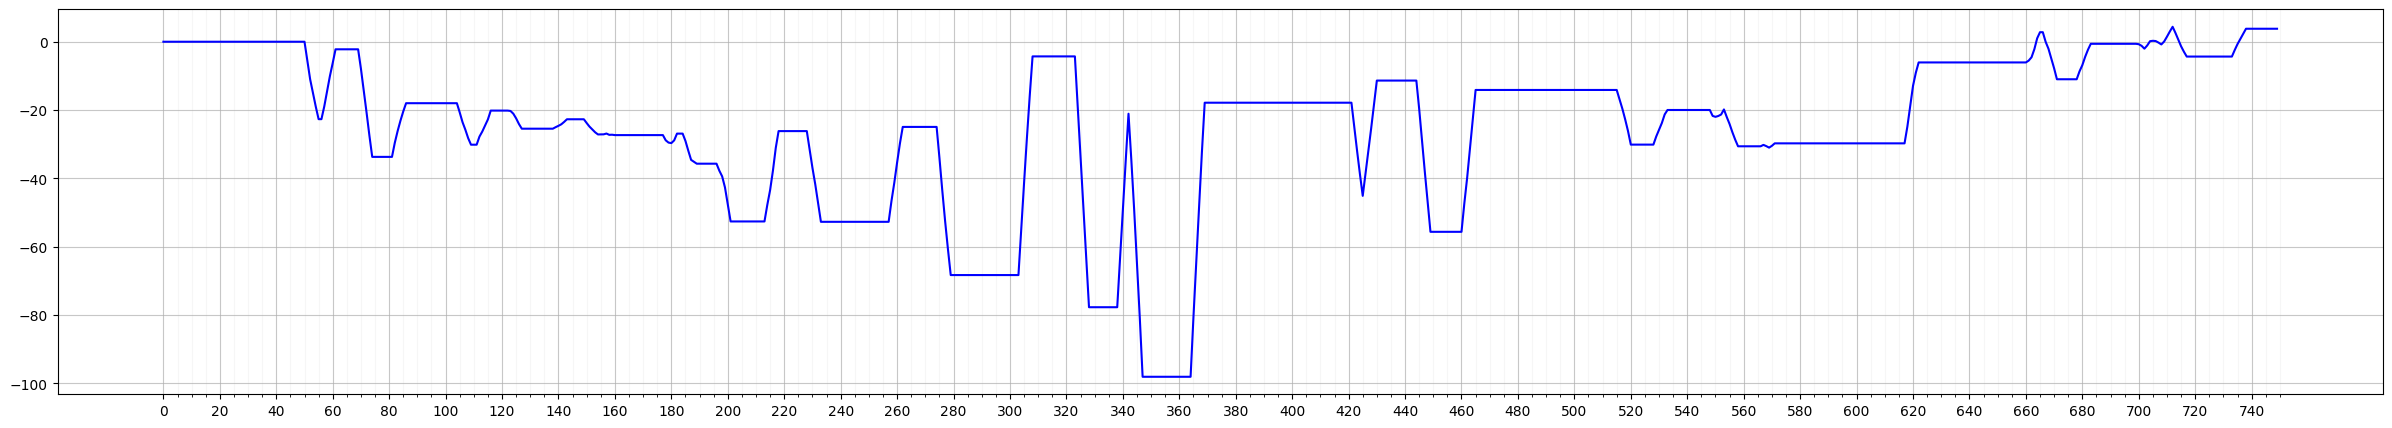

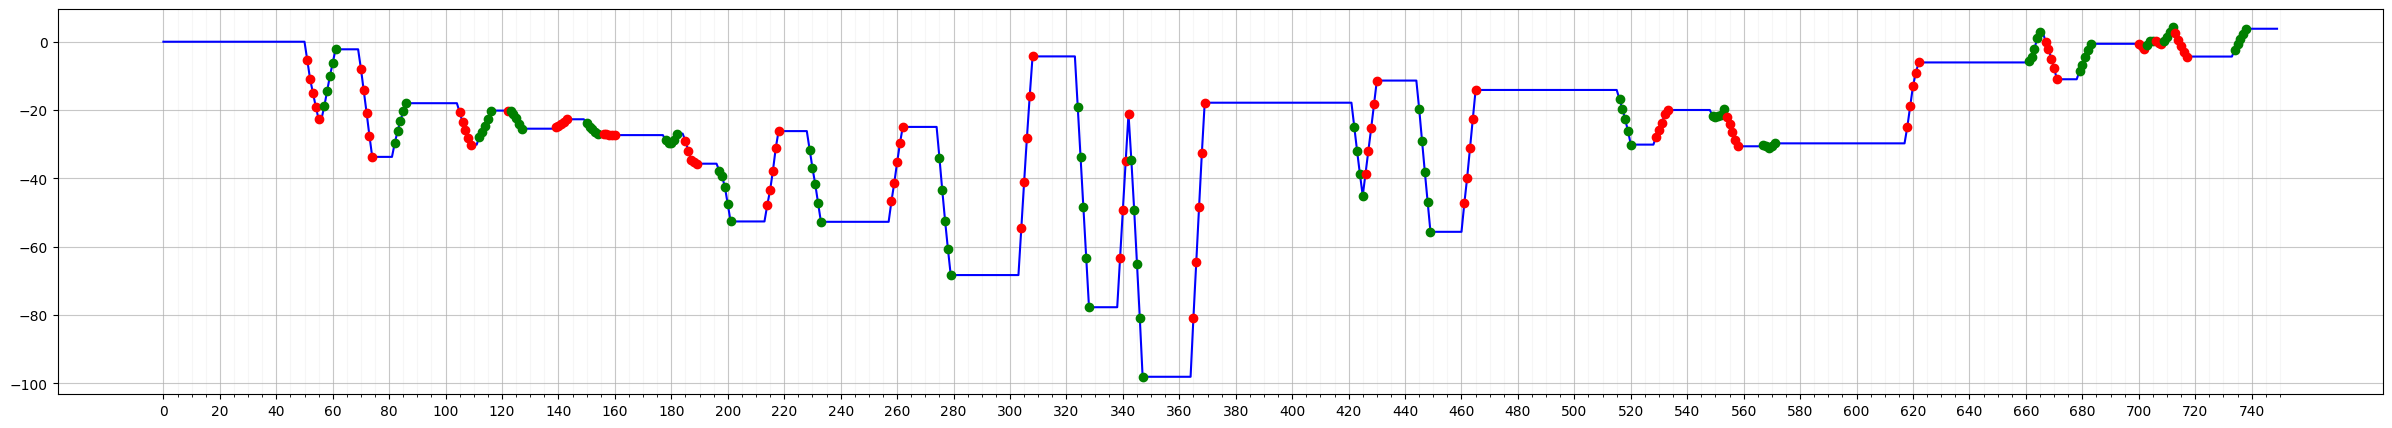

In [260]:
[account_balance, stoock_number, operation_history, account_balance_history, stoock_number_history, money_history] = main()

print(f"account_balance: {print_number(account_balance)}")
print(f"stoock_number:   {print_number(stoock_number)}")
print(f"after all:       {print_number(account_balance + (stoock_number*stooq_vals[-1]))}")

plot_chart(money_history)
plot_chart_with_operations(money_history, operation_history)


In [261]:
# # test 100x

# min_money = 0
# max_money = 0

# for i in range(100):
#   [account_balance, stoock_number, operation_history, account_balance_history, stoock_number_history, money_history] = main()
#   end_money = money_history[-1]
#   max_money = max(max_money, end_money)
#   min_money = min(min_money, end_money)
#   # plot_chart(money_history)
#   # print(len(money_history))
#   # time.sleep(1)

# print(f"max_money: {print_number(max_money)}")
# print(f"min_money:   {print_number(min_money)}")

In [262]:
mean_history = []
number_of_days_in_the_past = 15

tmp_mean = calculate_mean(stooq_vals[0:number_of_days_in_the_past])
for i in range(0, number_of_days_in_the_past, 1):
  mean_history.append(tmp_mean)

for i in range(number_of_days_in_the_past, len(stooq_vals), 1):
  prev_val = stooq_vals[i-number_of_days_in_the_past:i]
  tmp_mean = calculate_mean(prev_val)
  mean_history.append(tmp_mean)

=== Result for git: ===
account_balance: -482.20
stoock_number:   120.00
after all:       3.80
max_money: 4.38
min_money:   -98.07


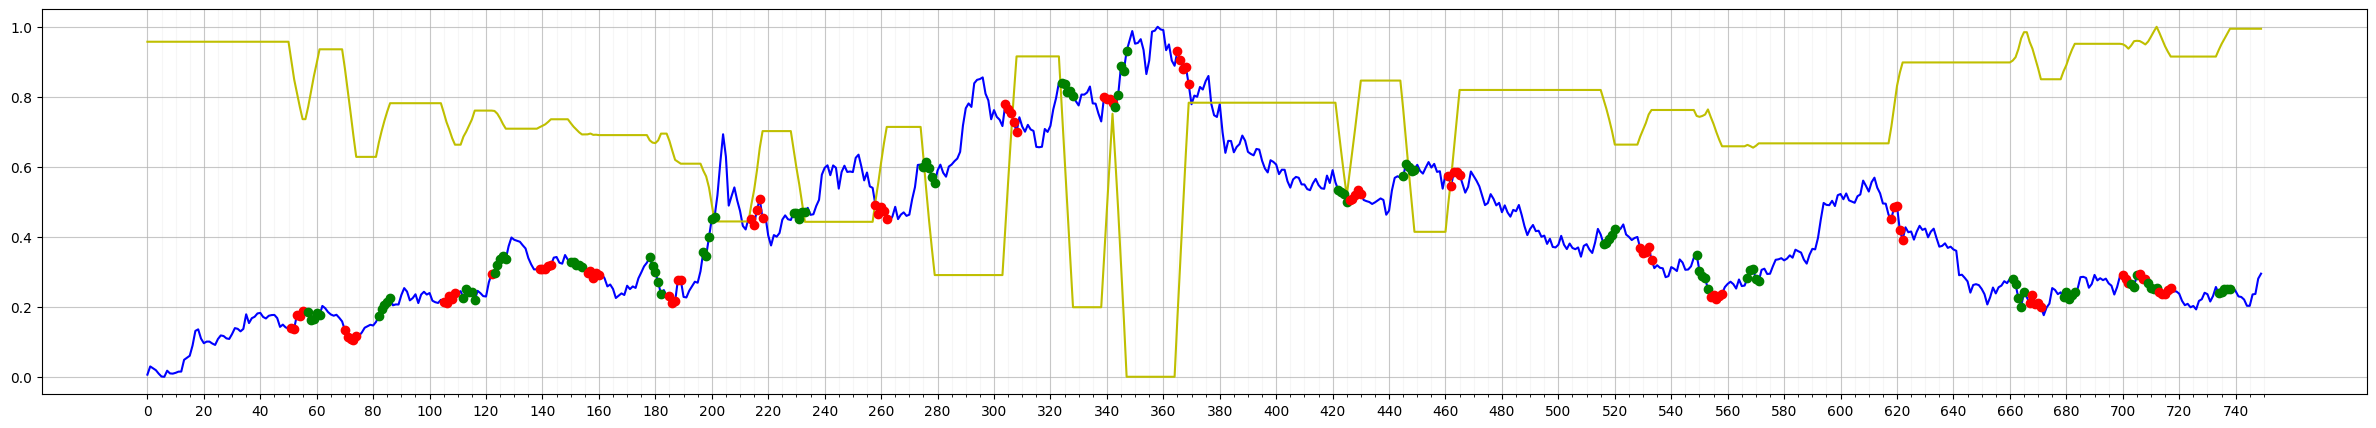

In [263]:
number_of_days_in_the_past = 15
[account_balance, stoock_number, operation_history, account_balance_history, stoock_number_history, money_history] = main()


print("=== Result for git: ===")
print(f"account_balance: {print_number(account_balance)}")
print(f"stoock_number:   {print_number(stoock_number)}")
print(f"after all:       {print_number(account_balance + (stoock_number*stooq_vals[-1]))}")

print(f"max_money: {print_number(max(money_history))}")
print(f"min_money:   {print_number(min(money_history))}")

norm_stooq_vals = get_normalized_data(stooq_vals)
norm_money_history = get_normalized_data(money_history)

plot_chart_with_operations_and_money(norm_stooq_vals, operation_history, norm_money_history)


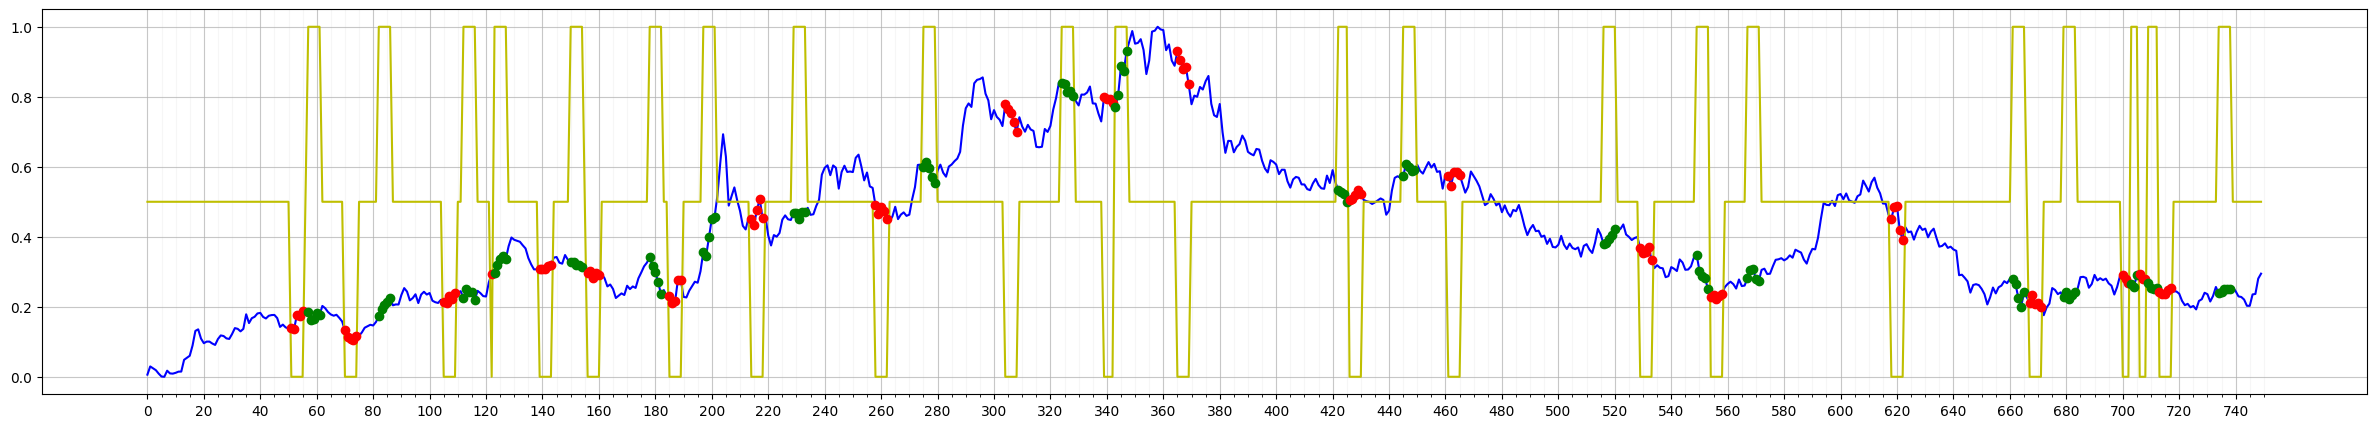

In [264]:

norm_stooq_vals = get_normalized_data(stooq_vals)
norm_operation_history = get_normalized_data(operation_history)

plot_chart_with_operations_and_money(norm_stooq_vals, operation_history, norm_operation_history)


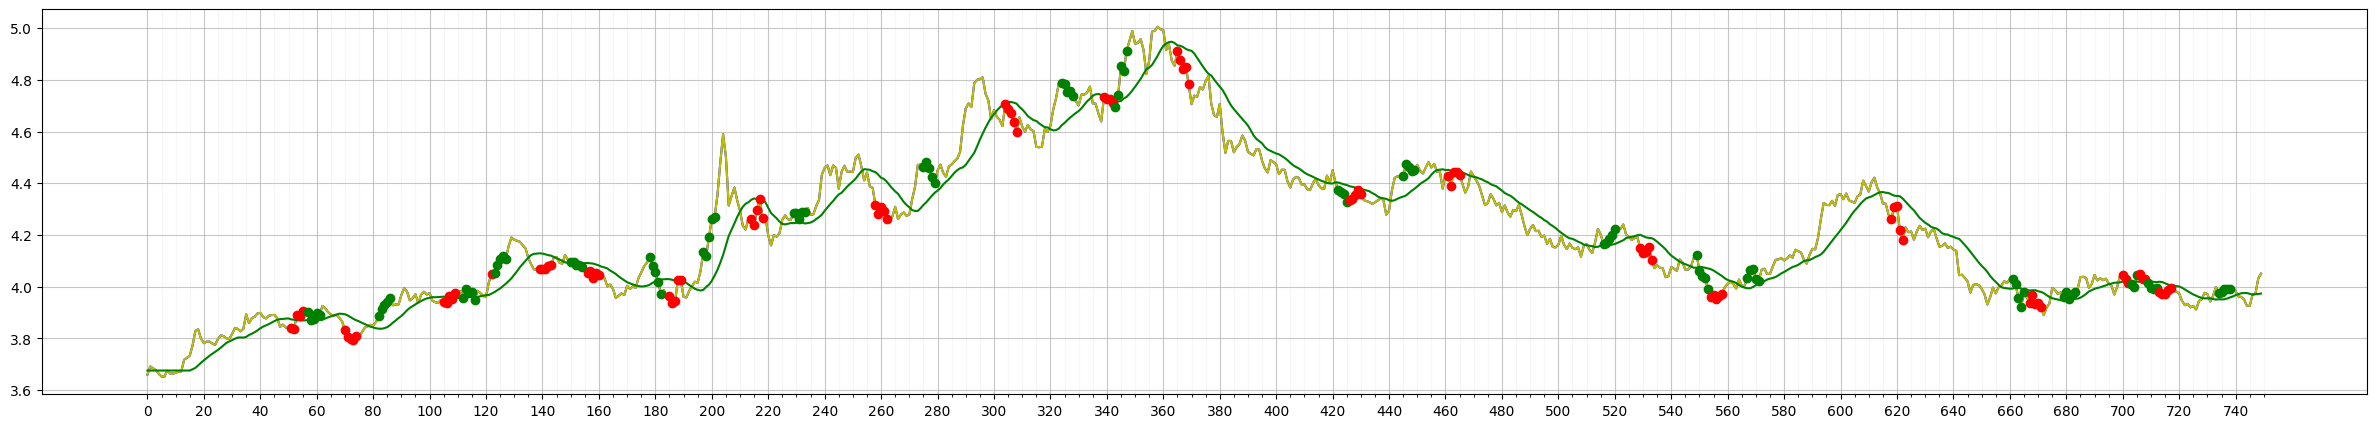

In [265]:

# norm_stooq_vals = get_normalized_data(stooq_vals[number_of_days_in_the_past:])
# norm_operation_history = get_normalized_data(operation_history)
# norm_mean_history = get_normalized_data(mean_history)

# plot_chart_with_operations_money_and_mean(norm_stooq_vals, operation_history, norm_operation_history, norm_mean_history)
plot_chart_with_operations_money_and_mean(stooq_vals, operation_history, stooq_vals, mean_history)